In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sequencing_tools.viz_tools import okabeito_palette, color_encoder

plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize =15)
plt.rc('ytick', labelsize = 15)

In [2]:
cov_table = '/stor/work/Lambowitz/cdw2854/cell_Free_nucleotides/tgirt_map/merged_bam/coverage/tss_coverage.feather'
cov_df = pd.read_feather(cov_table) \
    .assign(norm_cov = lambda d: d.groupby(['samplename'])\
                                    .coverage\
                                    .transform(lambda x: (x - x.min()) / (x.max() - x.min())))\
    .assign(signed_cov = lambda d: np.where(d.strand == "reverse", d.coverage, d.coverage))
cov_df.head()

,index,coverage,position,strand,samplename,norm_cov,signed_cov
0,0,3972.0,-1000,forward,polyA,0.043975,3972.0
1,1,3932.0,-999,forward,polyA,0.043137,3932.0
2,2,3892.0,-998,forward,polyA,0.042298,3892.0
3,3,3865.0,-997,forward,polyA,0.041732,3865.0
4,4,3845.0,-996,forward,polyA,0.041313,3845.0


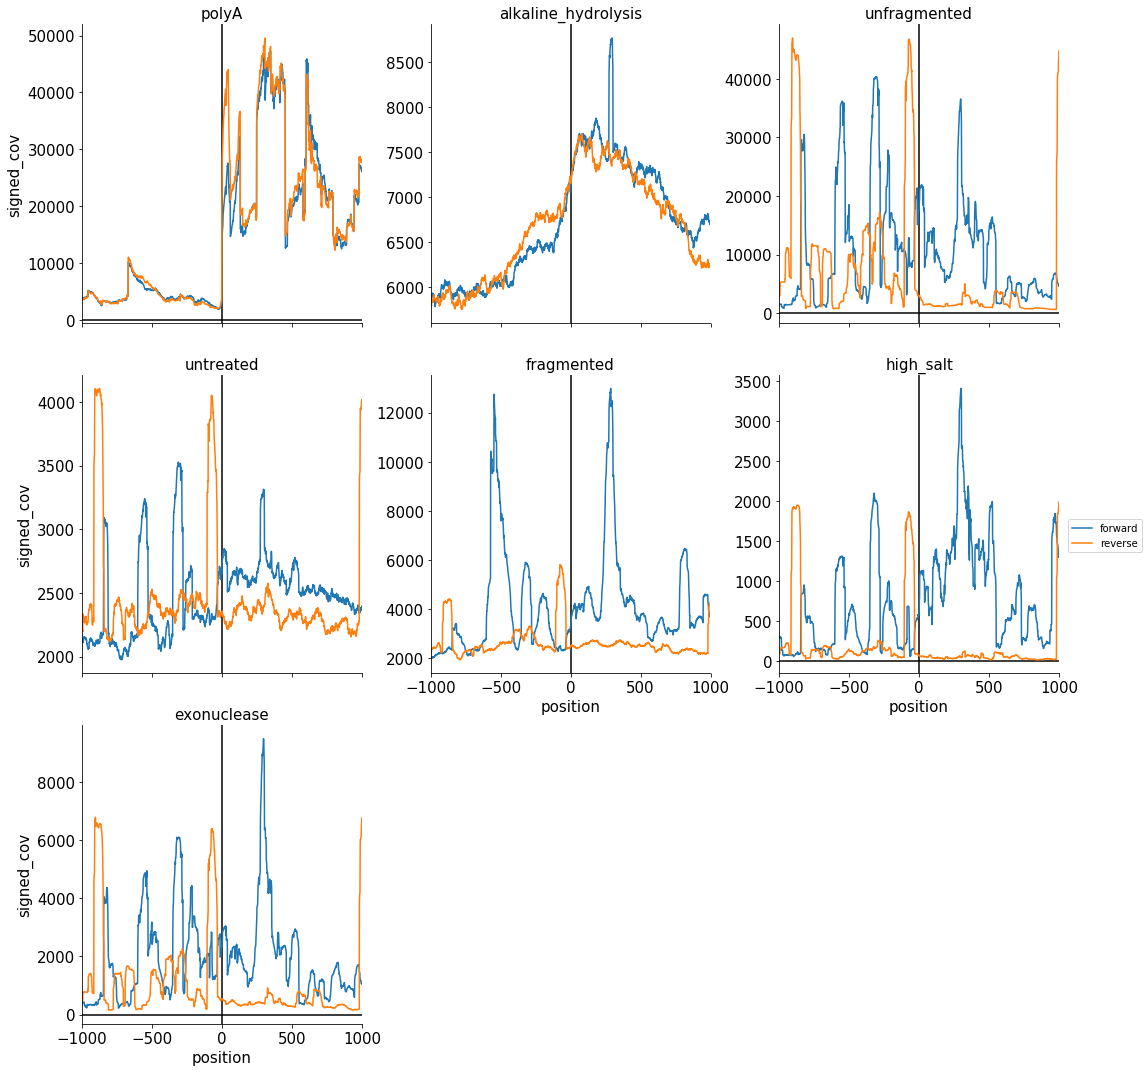

In [3]:
p = sns.FacetGrid(data = cov_df, 
                  col = 'samplename', 
                  col_wrap = 3,
                  hue = 'strand', 
                  size = 5, 
                  sharey=False)
p.map(plt.plot, 'position','signed_cov')
p.add_legend(title='')
p.set_titles('{col_name}')

for ax in p.fig.axes:
    ax.set_ylim(ax.get_ylim())
    ax.vlines(x = 0, ymin=-1e6, ymax = 1e6, color='black', alpha=1)
    ax.hlines(y = 0, xmin = -1000, xmax=1000, color= 'black')
p.set(xlim = (cov_df.position.min(),cov_df.position.max()))